# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# create my query - 'bitcoin'

print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# finding the number of instances of subject-relevant articles  = here we see over 10,000 !!!

btc_headlines['articles'][10]

# I select a random article to ensure that we're on the right track. [index 11] item in the list of articles


Total articles about Bitcoin: 10393


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Jonathan Shieber',
 'title': 'Crusoe Energy is tackling energy use for cryptocurrencies and data centers and greenhouse gas emissions',
 'description': 'The two founders of Crusoe Energy think they may have a solution to two of the largest problems facing the planet today — the increasing energy footprint of the tech industry and the greenhouse gas emissions associated with the natural gas industry. Crusoe, w…',
 'url': 'http://techcrunch.com/2021/04/26/crusoe-energy-is-tackling-energy-use-for-cryptocurrencies-and-data-centers-and-greenhouse-gas-emissions/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/04/GettyImages-462843546.jpg?w=600',
 'publishedAt': '2021-04-26T15:02:54Z',
 'content': 'The two founders of Crusoe Energy think they may have a solution to two of the largest problems facing the planet today — the increasing energy footprint of the tech industry and the greenhouse gas e… [+7655 chars]'

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# create my query - 'ethereum'

print(f"Total articles about Ethereium: {eth_headlines['totalResults']}")

# finding the number of instances of subject-relevant articles  = here we see over 3,000 !!!

eth_headlines['articles'][5]

# I select a random article to ensure that we're on the right track. [index 6] item in the list of articles


Total articles about Ethereium: 3999


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'ConsenSys raises $65M from JP Morgan, Mastercard, UBS to build infrastructure for\xa0DeFi',
 'description': 'ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0J.P. Morgan, Mastercard, and UBS AG, as well as major blockchain companies Protocol Labs, the Maker Foundation, Fenbushi, The LAO a…',
 'url': 'http://techcrunch.com/2021/04/13/consensys-raises-65m-from-jp-morgan-mastercard-ubs-to-build-infrastructure-for-defi/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2018/05/joe-lubin.jpg?w=601',
 'publishedAt': '2021-04-13T13:01:02Z',
 'content': 'ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0J.P. Morgan, Mastercard, and UBS AG, as well as major blockchain compan… [+8767 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'positive':pos,
            'negative':neg,
            'neutral':neu
        })
        
    except AttributeError:
        pass
    
    # create our new dictionary with all of the sentiments, as well as name and append into new dataframe
    
btc_df = pd.DataFrame(btc_sentiments)

# let's also re-order our columns so we can make sense of the data by date as well as sentiment
cols = ['date','text','compound','positive','negative','neutral']
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,2021-04-27,image copyrightGetty Images\r\nimage captionEl...,0.7003,0.167,0.0,0.833


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'positive':pos,
            'negative':neg,
            'neutral':neu
        })
        
    except AttributeError:
        pass
    
    # create our new dictionary with all of the sentiments, as well as name and append into new dataframe
    
eth_df = pd.DataFrame(eth_sentiments)

# let's also re-order our columns so we can make sense of the data by date as well as sentiment
cols = ['date','text','compound','positive','negative','neutral']
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.109590,0.056820,0.027660,0.915530
std,0.339262,0.067007,0.045173,0.083711
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.855500
50%,0.000000,0.048000,0.000000,0.928500
75%,0.323650,0.097750,0.060000,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.110711,0.050330,0.022910,0.92677
std,0.340047,0.066125,0.044394,0.07865
min,-0.918600,0.000000,0.000000,0.69400
25%,0.000000,0.000000,0.000000,0.87425
50%,0.000000,0.000000,0.000000,0.94250
75%,0.340000,0.079750,0.040500,1.00000
max,0.827100,0.256000,0.289000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: ***Bitcoin ***

Q: Which coin had the highest compound score?

A: ***Bitcoin, but only by a tiny margin***

Q. Which coin had the highest positive score?

A: ***Ethereum***

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [31]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("chars")
stop.append(" chars")
stop.append("chars ")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append(" Chars")
stop.append("Chars")
stop.append("Chars ")
stop.append(" Chars ")
stop.append("''")
stop = set(stop)


# Create a list of stopwords
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [32]:
# Complete the tokenizer function
# Let's create a new function to pull ALL news items containing BITCOIN and ETHEREUM.  The previous variables separately created, BTC and ETHEREUM.   
# We need them to pull together, so we can tokenize all information at the same time 

def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in text, words))
    lemmatizer = WordNetLemmatizer() 
    tokens = [lemmatizer.lemmatize(word) for word in words]
    print(words)

    return tokens


In [33]:
# Create a new tokens column for Bitcoin
# in-line - adding tokens into new column 'tokens' by adding and, applying our fn(text) - items directly into our btc and eth dataframes


btc_df['tokens'] = btc_df.text.apply(tokenizer)

eth_df['tokens']=eth_df.text.apply(tokenizer)



['Tesla', 'CFO', 'Zach', 'Kirkhorn', 'Monday', 'Instead']
['Cryptocurrency', 'PayPal', 'Bitcoin', 'Ethereum', 'Bitcoin', 'Cash', 'Litecoin', 'Venmo', 'With']
[]
['Cryptocurrency', 'Friday', 'Bitcoin', 'March', 'Bitcoin']
['copyrightGetty', 'Images', 'captionElon', 'Musk', 'Tesla', 'Tesla', 'Bitcoin']
['Earth', 'Day', 'So', 'Jack', 'Dorsey']
['Venmo', 'Tuesday', 'Venmo', 'Four']
['New', 'York', 'CNN', 'Business', 'Bitcoin', 'Saturday', 'But']
['Its', 'Robinhood', 'Christine', 'Brown', 'Robinhoods']
['By', 'Reuters', 'Staff', 'Reuters', '-MicroStrategy', 'Inc', 'Monday', 'Shares']
['Crusoe']
['We', 'Dogecoin', 'DOGE']
['By', 'Reuters', 'Staff', 'April', 'Reuters', 'MicroStrategy', 'Inc', 'Monday', 'R…']
['Jack', 'Dorsey', 'CEO', 'Twitter', 'Wednesday', '``', "''", 'Elon', 'Musk', '``', 'True', '``', 'BBC', '``']
['Coinswitch', 'Kuber', 'India', 'Thursday', 'Indi…']
['By', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Tesla', 'Santa', 'Clarita', 'California', 'U.S.', 'October', 'REUTERS/Mike', 'B

In [34]:
# checking our work !  

eth_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835,"[Their, Detractors, North, Carolina, Attorney,..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[Cryptocurrency, PayPal, Bitcoin, Ethereum, Bi..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966,"[Venmo, Tuesday, Venmo, Four]"
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[New, York, CNN, Business, Bitcoin, Saturday, ..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909,"[CryptoPunks, NFT, Meebits, 3D]"
...,...,...,...,...,...,...,...
95,2021-04-30,TOKYO (Reuters) - The U.S. dollar skidded towa...,0.4404,0.133,0.054,0.813,"[TOKYO, Reuters, U.S., Friday, Federal, Reserve]"
96,2021-04-27,The Golden State Warriors are bouncing into th...,0.0000,0.000,0.000,1.000,"[Golden, State, Warriors, NFT, Tuesday]"
97,2021-04-20,In this photo illustration a Venmo mobile paym...,0.0000,0.000,0.000,1.000,"[In, Venmo, Igor, Golovniov/SOPA, Images/Light..."
98,2021-04-19,Yuriko Nakao/Getty Images\r\nWall Street Bets ...,0.6369,0.157,0.000,0.843,"[Yuriko, Nakao/Getty, Images, Wall, Street, Be..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [35]:
from collections import Counter
from nltk import ngrams

# to get a good sense of what data is requested on the news api - we need to first 
# get some accurate word counts. 

In [39]:
# Generate the Bitcoin N-grams where N=2
#N=2

btc_grams = ngrams(tokenizer(btc_df.text.str.cat()), n=2)
#print(dict(btc_grams))

Counter(btc_grams).most_common(20)


['Tesla', 'CFO', 'Zach', 'Kirkhorn', 'Monday', 'PayPal', 'Litecoin', 'Venmo', 'Friday', 'copyrightGetty', 'Images', 'captionElon', 'Musk', 'Tesla', 'Tesla', 'Earth', 'Jack', 'Dorsey', 'Venmo', 'Tuesday', 'Venmo', 'Four', 'York', 'CNN', 'Business', 'Saturday', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'Reuters', 'Staff', 'Reuters', '-MicroStrategy', 'Monday', 'Crusoe', 'Dogecoin', 'DOGE', 'Reuters', 'Staff', 'April', 'Reuters', 'MicroStrategy', 'Monday', 'Jack', 'Dorsey', 'CEO', 'Twitter', 'Wednesday', '``', "''", 'Elon', 'Musk', '``', 'True', '``', 'BBC', '``', 'Coinswitch', 'Kuber', 'India', 'Thursday', 'Indi…', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Tesla', 'Santa', 'Clarita', 'California', 'U.S.', 'October', 'REUTERS/Mike', 'Blake', 'Reuters', 'Tesla', 'Reuters', 'Staff', 'April', 'Reuters', 'Sunday', 'Reuters', 'Staff', 'LONDON', 'April', 'Reuters', 'Tuesday', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'REUTERS/Dado', 'Ruvic/Illustration/File', 'Photo', 'LON…', 'Marseille', 'France

[(('Reuters', 'Staff'), 18),
 (('April', 'Reuters'), 8),
 (('Staff', 'April'), 6),
 (('``', "''"), 5),
 (('Staff', 'FILE'), 5),
 (('FILE', 'PHOTO'), 5),
 (('Opinions', 'Entrepreneur'), 5),
 (('Coinbase', 'Global'), 5),
 (('Staff', 'Reuters'), 4),
 (('Elon', 'Musk'), 4),
 (('Spanish', 'Errors'), 4),
 (('Musk', 'Tesla'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration/File'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('Global', 'Wednesday'), 3),
 (('Friday', 'U.S.'), 3),
 (('February', 'REUTERS/Dado'), 3),
 (('Jack', 'Dorsey'), 2),
 (('Musk', '``'), 2),
 (('Tesla', 'Santa'), 2)]

In [40]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(eth_df.text.str.cat()), n=2)

Counter(eth_grams).most_common(20)


['Detractors', 'North', 'Carolina', 'Attorney', 'General', 'Josh', 'Stein', 'Leda', 'Health', 'Madison', 'Campbell', 'Liesel', 'Vaidya', 'PayPal', 'Litecoin', 'Venmo', 'Venmo', 'Tuesday', 'Venmo', 'York', 'CNN', 'Business', 'Saturday', 'CryptoPunks', 'Meebits', '3D', 'ConsenSys', 'J.P.', 'Morgan', 'Mastercard', 'UBS', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'StockMarketUS', 'Edge', 'Monday', 'Morning', 'U.S.', 'Monday', 'Spanish', 'Errors', 'Vitalik', 'Buterin', 'NFTs', 'Topps', 'NFT-based', 'Jones', 'Stre…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Reuters', 'Staff', 'SINGAPORE', 'Reuters', 'Monday', 'Europe…', 'Reuters', 'Staff', 'EIB', 'SINGAPORE', 'Reuters', 'Monday', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'Sotheby', 'Tuesday', 'Banksy', '``', 'Love', "''", 'A

[(('Reuters', 'Staff'), 9),
 (('Opinions', 'Entrepreneur'), 6),
 (('February', 'REUTERS/Dado'), 5),
 (('April', 'Reuters'), 5),
 (('Spanish', 'Errors'), 4),
 (('April', 'Opinions'), 4),
 (('March', 'REUTERS/Dado'), 4),
 (('Dado', 'Ruvic/Reuters'), 4),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('Monday', 'Reuters'), 3),
 (('Yuriko', 'Nakao/Getty'), 3),
 (('Staff', 'April'), 3),
 (('Venmo', 'Tuesday'), 2),
 (('Tuesday', 'Venmo'), 2),
 (('J.P.', 'Morgan'), 2),
 (('Morgan', 'Mastercard'), 2),
 (('Staff', 'February'), 2),
 (('Ruvic/Illustration', 'SINGAPORE…'), 2),
 (('REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency'), 2),
 (('Vitalik', 'Buterin'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [57]:
btc_df.text.astype(str)

0     Tesla’s relationship with bitcoin is not a dal...
1     Cryptocurrency continues to gain mainstream ac...
2     The crypto industry as a whole has seen a mome...
3     Cryptocurrency prices continued to tumble Frid...
4     image copyrightGetty Images\r\nimage captionEl...
                            ...                        
95    (Reuters) - Evolving rules, environmental conc...
96    LONDON (Reuters) - Coinbase Global Inc, the bi...
97    The bank will not facilitate the buying or exc...
98    Bitcoin "fell dramatically in late April," wri...
99    Mastercard and BNY Mellon warmed to bitcoin on...
Name: text, Length: 100, dtype: object

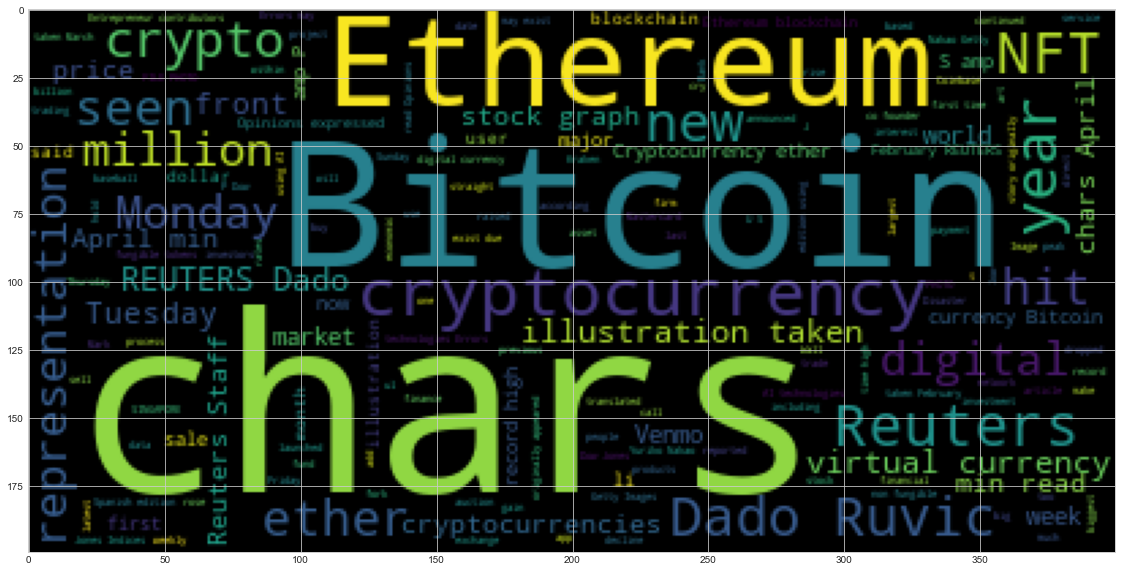

In [69]:
# Generate the Bitcoin word cloud
big_string_btc = ' '.join(btc_df.text)   # learning this the hard way. The way that Word Cloud processes information, pandas DataFrames are not recognized. So, we have to ''.join() the text into one giant array
wc = WordCloud().generate(big_string)  # Then we can pass our big_string variable into the '.generate() ' function. 
plt.imshow(wc)  # Success !!! 

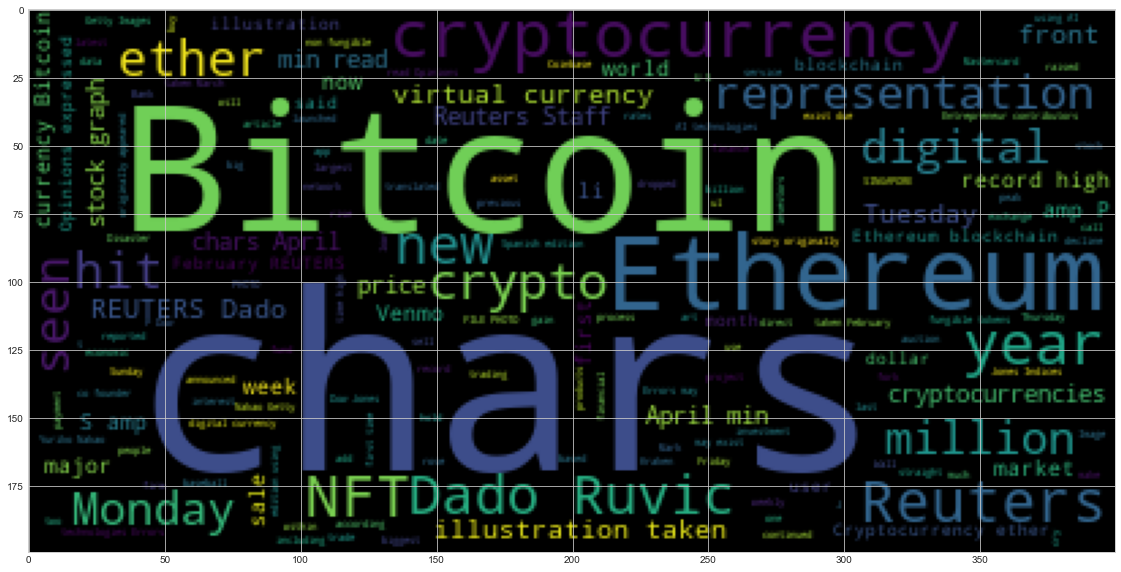

In [71]:
# Generate the Ethereum word cloud
# Same thing with Ethereum dataframe. 
big_string_eth = ' '.join(eth_df.text)   # learning this the hard way. The way that Word Cloud processes information, pandas DataFrames are not recognized. So, we have to ''.join() the text into one giant array
wc = WordCloud().generate(big_string)  # Then we can pass our big_string variable into the '.generate() ' function. 
plt.imshow(wc)  # Success !!! 

---
## Quite a few repeats.  BTC and ETH are tied closely in the news 
## Apparently we cannot mention one without the other. 
---
---


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [68]:
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
#  GOOD thing, we already did this above - when we created our word cloud ''.join function
#  now we use the same Variables as above 

big_string_btc    #and 
big_string_eth

In [141]:
# Run the NER processor on all of the text
big_string_btc = ' '.join(btc_df['text']) 
doc = nlp(big_string_btc)
displacy.render(doc, style = 'ent')

# Add a title to the document
doc.user_data['Title'] = 'Bitcoin NER'
displacy.render(doc, style = 'ent')


In [142]:
# List all Entities
for ent in doc.ents:
    print(ent, ent.label_)

CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
California GPE
U.S. GPE
October 2, 2019 DATE
Mike Blake
 P

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# we already have a Ethereum df concated.  'eth_df'

In [143]:
# Run the NER processor on all of the text
big_string_eth = ' '.join(eth_df['text']) 
doc = nlp(big_string_eth)
displacy.render(doc, style = 'ent')

# Add a title to the document
doc.user_data['Title'] = 'Ethereum NER'
displacy.render(doc, style = 'ent')


In [144]:
# List all Entities
for ent in doc.ents:
    print (ent, ent.label_)


North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Topps GPE
first ORDINAL
NFT ORG
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Reuters ORG
SINGAPORE GPE
May 3

---